1. Load The Dataset

2. Select feature

3. split into 3 Partitions: Train, Val & Test
    
4. Preprocess The Inputs

5. Pick The Best Model w/Lowest Validation Error

6. Evaluate The Chose Model

In [1]:
import pandas as pd


# 1.Load The Dataset

In [2]:
original_df = pd.read_csv(r'C:\Users\Rishi\Downloads\Pokemon.csv')

original_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# 2. Select Features

In [4]:
modified_df = original_df[['HP', 'Attack', 'Defense',
                           'Sp. Atk', 'Sp. Def', 'Speed']]

modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


# 3. Split into 3 Partitions: Train, Val & Test

In [6]:
Shuffled_df = modified_df.sample(frac=1)
Shuffled_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
366,75,110,110,110,105,80
337,40,45,40,65,40,65
726,72,95,67,103,71,122
491,58,70,45,40,45,42
560,55,55,45,63,45,45
...,...,...,...,...,...,...
73,80,100,70,50,60,45
331,60,90,140,50,50,40
617,75,86,67,106,67,60
225,60,80,50,40,40,30


In [8]:
train_df = Shuffled_df[:500]
val_df = Shuffled_df[500:650]
test_df = Shuffled_df[650:]


len(train_df), len(val_df), len(test_df)


(500, 150, 150)

In [9]:
X_train, y_train = train_df.to_numpy()[:, :-1], train_df.to_numpy()[:, -1]
X_val, y_val = val_df.to_numpy()[:, :-1], val_df.to_numpy()[:, -1]
X_test, y_test = test_df.to_numpy()[:, :-1], test_df.to_numpy()[:, -1]

(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)


(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

# 4. Preprocess The Inputs

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

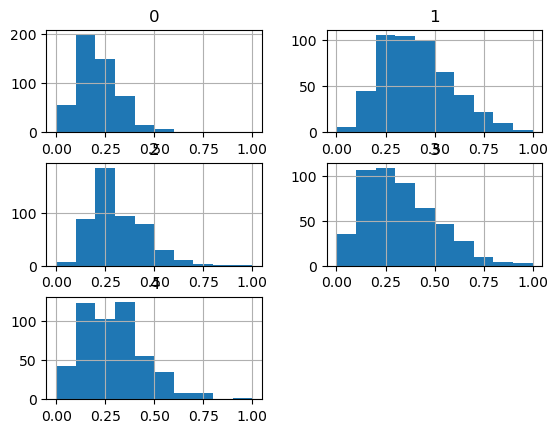

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled, X_val_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist()

# 5. Pick The Best Model w/ Lowest Validation Error

In [17]:
average_speed = y_train.mean()

average_speed

68.932

In [16]:
from sklearn.metrics import mean_absolute_error

average_speed = y_train.mean()

mean_absolute_error(y_val, [average_speed]*len(y_val))

24.19152

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

mean_absolute_error(y_val, linear_model.predict(X_val))

19.879152587344173

In [19]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)

mean_absolute_error(y_val, random_forest.predict(X_val))

19.102753968253968

In [20]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100


16/16 [==============================] - 1s 8ms/step - loss: 49366.1445 - mean_absolute_error: 213.7386 - val_loss: 35711.9883 - val_mean_absolute_error: 182.1782
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 27093.3555 - mean_absolute_error: 157.0021 - val_loss: 18284.0762 - val_mean_absolute_error: 128.9681
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 13206.5322 - mean_absolute_error: 107.3951 - val_loss: 8406.0146 - val_mean_absolute_error: 84.9463
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 5917.1709 - mean_absolute_error: 68.6715 - val_loss: 3745.1721 - val_mean_absolute_error: 52.7226
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 2702.9761 - mean_absolute_error: 43.2865 - val_loss: 1982.0389 - val_mean_absolute_error: 36.1481
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 1658.1375 - mean_absolute_error: 31.9603 - val_loss: 1386.

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 8ms/step - loss: 2428.6973 - mean_absolute_error: 39.3959 - val_loss: 1891.6873 - val_mean_absolute_error: 35.8411
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 992.4770 - mean_absolute_error: 24.7259 - val_loss: 871.9319 - val_mean_absolute_error: 23.6096
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 733.3512 - mean_absolute_error: 21.2344 - val_loss: 775.9316 - val_mean_absolute_error: 21.9163
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 684.0096 - mean_absolute_error: 20.5962 - val_loss: 704.9721 - val_mean_absolute_error: 21.1124
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 696.1133 - mean_absolute_error: 20.7179 - val_loss: 706.4692 - val_mean_absolute_error: 21.1053
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 697.7447 - mean_absolute_error: 20.7528 - val_loss: 710.2420 - val_mean_absolute

In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                192       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 6. Evaluate The Chosen Model

In [24]:
mean_absolute_error(y_test, linear_model.predict(X_test))

18.474610586130915